In [11]:
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # Menambahkan GridSearchCV/RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE


# Statistical Libraries
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

Dimulai dengan meng-import dataset sebagai DataFrame dengan Pandas, serta melihat 5 baris pertama dengan head() method.
Lalu, melakukan pembersihan kolom yang tidak relevan dengan tujuan proyek.

In [12]:
# --- 1. Memuat Data (Loading Data) ---
# Memuat dataset Churn_Modelling.csv
# Pastikan file 'Churn_Modelling.csv' berada di direktori yang sama dengan notebook ini,
# atau sediakan path lengkap ke file tersebut.
try:
    df = pd.read_csv('Churn_Modelling.csv')
    print("Dataset berhasil dimuat!")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'Churn_Modelling.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    # Exit atau tangani error lebih lanjut jika file tidak ada
    exit()

# Menampilkan informasi dasar dataset
print("\n--- Informasi Dataset ---")
df.info()

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe().T) # Menggunakan .T agar lebih mudah dibaca

Dataset berhasil dimuat!
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [13]:
# --- 2. Pembersihan dan Persiapan Data Awal (Initial Data Cleaning and Preparation) ---

# Menghapus kolom yang tidak relevan untuk prediksi churn
# 'RowNumber', 'CustomerId', 'Surname' biasanya tidak memberikan informasi prediktif
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print("\nKolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.")

# Mengidentifikasi missing values
print("\n--- Melakukan pengecekan terhadap missing values ---")
print(df.isnull().sum())
# Untuk dataset ini, sepertinya tidak ada missing values, tapi langkah ini penting


# --- 3. Identifikasi Variabel Kategorikal dan Numerik ---
# Variabel kategorikal
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'] 
# Variabel numerik (kontinu)
numerical_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

print(f"\nVariabel Kategorikal: {list(categorical_features)}")
print(f"Variabel Numerik : {list(numerical_features)}")


Kolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.

--- Melakukan pengecekan terhadap missing values ---
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Variabel Kategorikal: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Variabel Numerik : ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']


## Exploratory Data Analysis




--- Distribusi Variabel Target (Exited) ---
Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


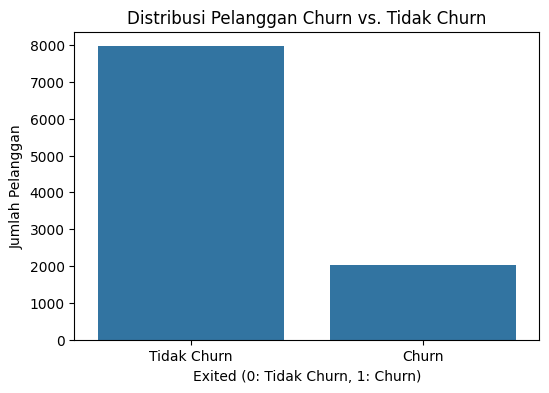

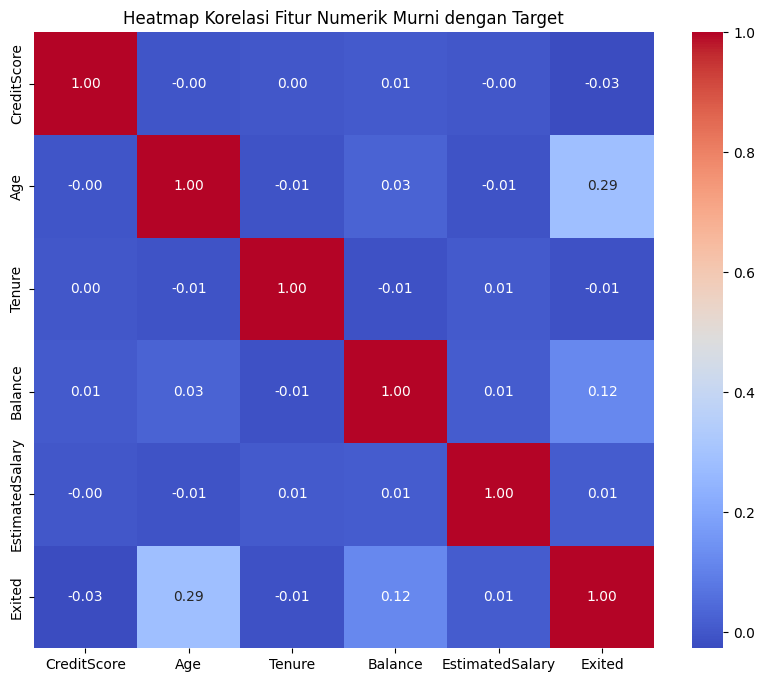

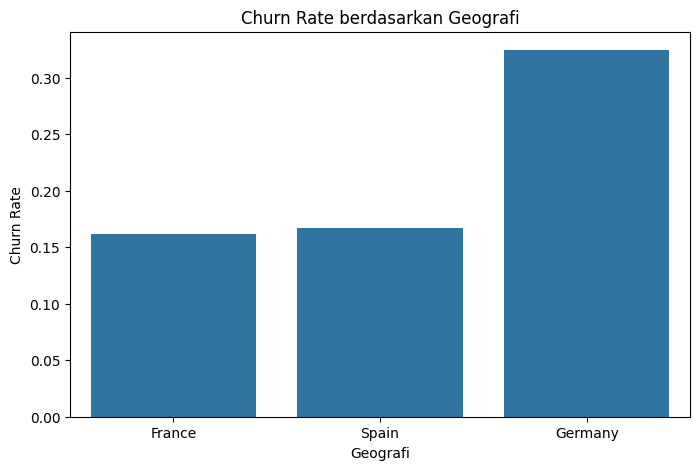

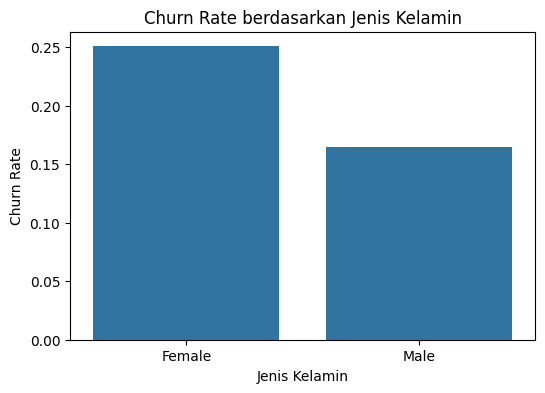

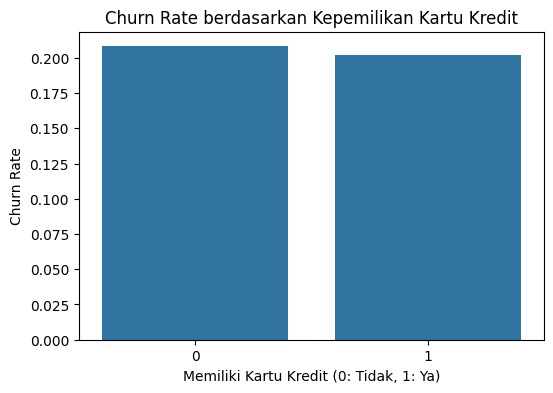

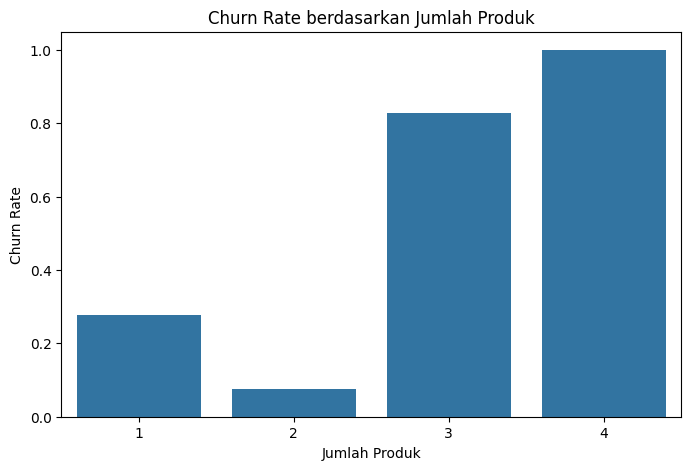

In [4]:
# --- 3. Eksplorasi Data Awal (Initial Exploratory Data Analysis - EDA) ---

# Analisis distribusi variabel target (Exited)
print("\n--- Distribusi Variabel Target (Exited) ---")
print(df['Exited'].value_counts())
print(df['Exited'].value_counts(normalize=True) * 100) # Persentase churn

# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Pelanggan Churn vs. Tidak Churn')
plt.xlabel('Exited (0: Tidak Churn, 1: Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.show()

# Visualisasi korelasi fitur numerik murni dengan 'Exited' (menggunakan heatmap)
# Sekarang hanya menggunakan fitur numerik murni
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik Murni dengan Target')
plt.show()

# Contoh visualisasi untuk fitur kategorikal vs. Churn
# Churn rate berdasarkan Geografi
plt.figure(figsize=(8, 5))
sns.barplot(x='Geography', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate berdasarkan Geografi')
plt.xlabel('Geografi')
plt.ylabel('Churn Rate')
plt.show()

# Churn rate berdasarkan Jenis Kelamin
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Churn Rate')
plt.show()

# Churn rate berdasarkan HasCrCard (sekarang diperlakukan kategorikal)
plt.figure(figsize=(6, 4))
sns.barplot(x='HasCrCard', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate berdasarkan Kepemilikan Kartu Kredit')
plt.xlabel('Memiliki Kartu Kredit (0: Tidak, 1: Ya)')
plt.ylabel('Churn Rate')
plt.show()

# Churn rate berdasarkan NumOfProducts (sekarang diperlakukan kategorikal)
plt.figure(figsize=(8, 5))
sns.barplot(x='NumOfProducts', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate berdasarkan Jumlah Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Churn Rate')
plt.show()

In [5]:
# --- 4. Persiapan Data untuk Model (Data Preparation for Modeling) ---

# Memisahkan fitur (X) dan variabel target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Pembagian data menjadi training dan testing set
# Penting: Lakukan stratifikasi pada 'y' karena dataset tidak seimbang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nUkuran X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Distribusi y_train sebelum SMOTE:\n{y_train.value_counts()}")

# Preprocessing: Skala untuk fitur numerik dan One-Hot Encoding untuk fitur kategorikal
# Menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Penskalaan standar untuk fitur numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-Hot Encoding untuk fitur kategorikal
])

# Gabungkan transformer menggunakan ColumnTransformer
# Pastikan nama kolom di `numerical_features` dan `categorical_features` sesuai dengan `X_train`
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features), # Sekarang hanya fitur numerik murni
        ('cat', categorical_transformer, categorical_features) # Semua fitur kategorikal (termasuk 0/1 dan 1-4)
    ],
    remainder='passthrough' # Biarkan kolom lain jika ada (tidak ada dalam kasus ini)
)

# Terapkan preprocessor ke training data
# Perlu transformasi X_train sebelum SMOTE karena SMOTE bekerja pada data numerik
# fit_transform pada X_train untuk mempelajari transformasi dari data training
X_train_processed = preprocessor.fit_transform(X_train)

# Mendapatkan nama fitur setelah one-hot encoding
# Urutan nama fitur: numerik murni, lalu one-hot encoded kategorikal
onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + onehot_feature_names.tolist()

# Konversi kembali ke DataFrame untuk kemudahan penanganan dengan SMOTE
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)

# --- 5. Penanganan Imbalance Data dengan SMOTE ---
print("\n--- Menerapkan SMOTE pada Training Data ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed_df, y_train)

print(f"Original training dataset shape: {y_train.value_counts()}")
print(f"Resampled training dataset shape: {y_train_resampled.value_counts()}")


Ukuran X_train: (8000, 10), y_train: (8000,)
Ukuran X_test: (2000, 10), y_test: (2000,)
Distribusi y_train sebelum SMOTE:
Exited
0    6370
1    1630
Name: count, dtype: int64

--- Menerapkan SMOTE pada Training Data ---
Original training dataset shape: Exited
0    6370
1    1630
Name: count, dtype: int64
Resampled training dataset shape: Exited
1    6370
0    6370
Name: count, dtype: int64


In [6]:
# --- 6. Membangun dan Melatih Model (Building and Training the Model) ---

# Menggunakan Random Forest sebagai alternatif model yang lebih kuat
# Random Forest cenderung bekerja baik dengan data tabular dan dapat menangani fitur non-linier
# Catatan: n_estimators di sini adalah nilai awal, akan di-tuning nanti
initial_model_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Latih model awal untuk mendapatkan baseline dan probabilitas untuk threshold adjustment
print(f"\n--- Melatih Model Awal RandomForestClassifier pada Data Resampled ---")
initial_model_rf.fit(X_train_resampled, y_train_resampled)
print(f"Model Awal RandomForestClassifier berhasil dilatih!")


--- Melatih Model Awal RandomForestClassifier pada Data Resampled ---
Model Awal RandomForestClassifier berhasil dilatih!



--- Metrik Evaluasi Model BASELINE (RandomForestClassifier) ---
Accuracy: 0.8440
Precision: 0.6240
Recall: 0.5872
F1-Score: 0.6051
AUC-ROC: 0.8419

--- Classification Report BASELINE ---
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.59      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000


--- Confusion Matrix BASELINE ---
[[1449  144]
 [ 168  239]]


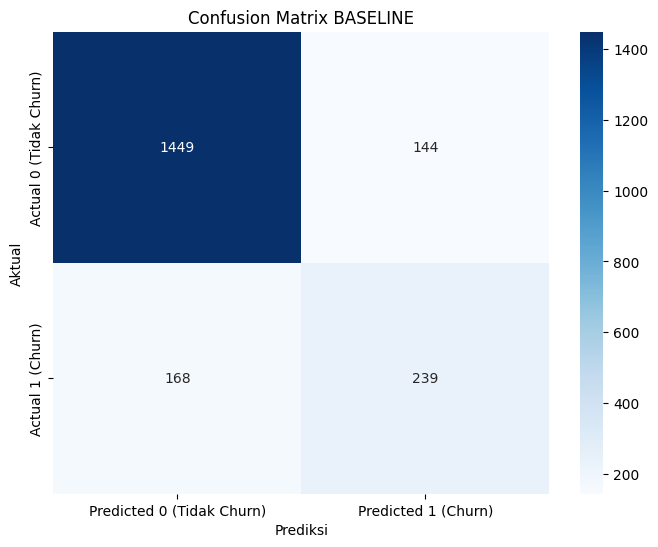

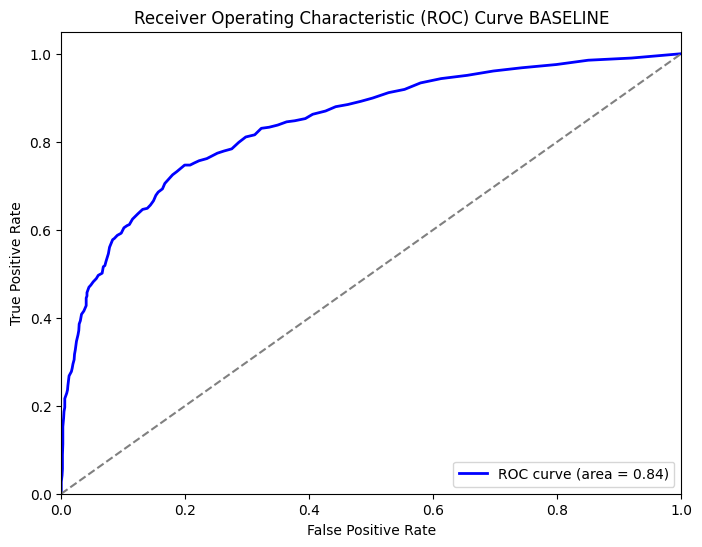

In [7]:
# --- 7. Evaluasi Model (Model Evaluation) - Baseline ---

# Pertama, terapkan preprocessor ke test data
X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)

# Membuat prediksi pada test set (data yang tidak di-resample)
y_pred_baseline = initial_model_rf.predict(X_test_processed_df)
y_proba_baseline = initial_model_rf.predict_proba(X_test_processed_df)[:, 1] # Probabilitas kelas positif (churn)

print(f"\n--- Metrik Evaluasi Model BASELINE (RandomForestClassifier) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_baseline):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_baseline):.4f}")

# Classification Report (memberikan detail precision, recall, f1-score per kelas)
print("\n--- Classification Report BASELINE ---")
print(classification_report(y_test, y_pred_baseline))

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print("\n--- Confusion Matrix BASELINE ---")
print(cm_baseline)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Tidak Churn)', 'Predicted 1 (Churn)'],
            yticklabels=['Actual 0 (Tidak Churn)', 'Actual 1 (Churn)'])
plt.title('Confusion Matrix BASELINE')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Kurva ROC
fpr_baseline, tpr_baseline, thresholds_roc_baseline = roc_curve(y_test, y_proba_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba_baseline):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve BASELINE')
plt.legend(loc="lower right")
plt.show()


--- Implementasi Peningkatan: Penyesuaian Threshold ---


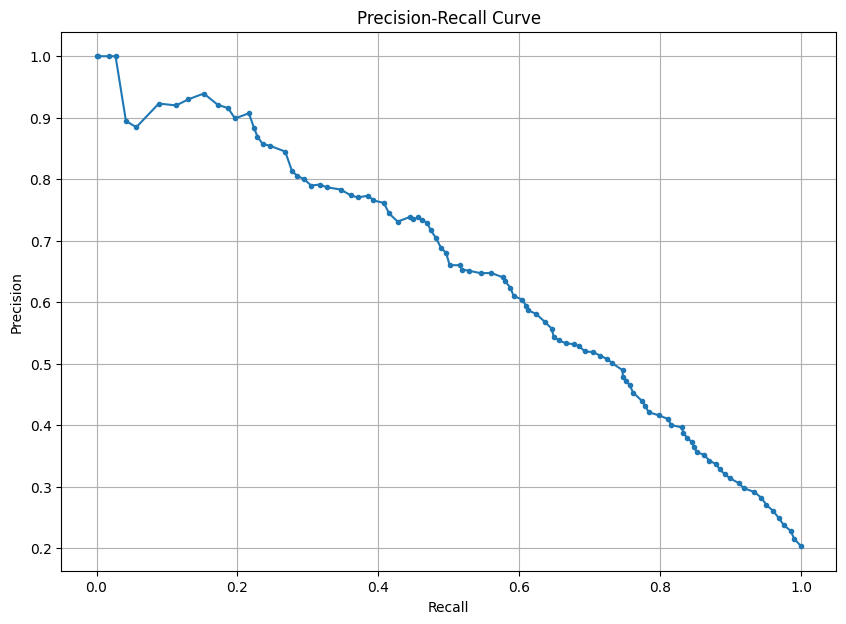

Threshold optimal berdasarkan F1-score: 0.5300

--- Metrik Evaluasi Model dengan Threshold = 0.35 ---
Accuracy: 0.8010
Precision: 0.5077
Recall: 0.7248
F1-Score: 0.5972
AUC-ROC: 0.8419

--- Classification Report dengan Threshold Disesuaikan ---
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.51      0.72      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000


--- Confusion Matrix dengan Threshold Disesuaikan ---
[[1307  286]
 [ 112  295]]


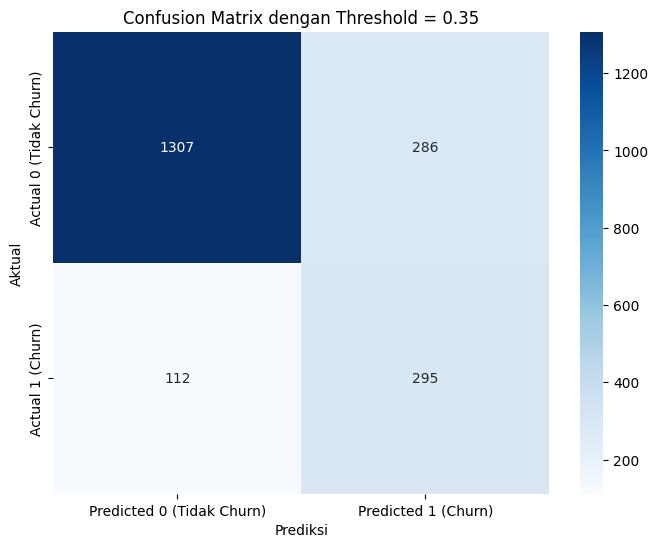

In [8]:
# --- 8. Implementasi Peningkatan: 1. Penyesuaian Threshold ---
print("\n--- Implementasi Peningkatan: Penyesuaian Threshold ---")

# Menghitung Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_baseline)

# Visualisasi Precision-Recall Curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Mencari threshold yang optimal (misalnya, di mana Precision dan Recall cukup seimbang atau recall tinggi)
# Anda bisa memilih threshold secara manual dari plot, atau mencari titik tertentu.
# Contoh: mencari threshold di mana precision dan recall cukup seimbang atau recall mulai turun drastis
fscore = (2 * precision * recall) / (precision + recall) # Menghitung F-score untuk setiap threshold
ix = np.argmax(fscore) # Mencari indeks threshold dengan F-score tertinggi
optimal_threshold_f1 = thresholds_pr[ix]
print(f"Threshold optimal berdasarkan F1-score: {optimal_threshold_f1:.4f}")

# Mari kita coba threshold yang sedikit lebih rendah untuk meningkatkan recall, misalnya 0.3
# Anda bisa bereksperimen dengan nilai ini berdasarkan kebutuhan bisnis
new_threshold = 0.35 # Contoh threshold yang dipilih secara manual untuk meningkatkan recall

# Membuat prediksi baru dengan threshold yang disesuaikan
y_pred_tuned_threshold = (y_proba_baseline >= new_threshold).astype(int)

print(f"\n--- Metrik Evaluasi Model dengan Threshold = {new_threshold:.2f} ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_threshold):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned_threshold):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned_threshold):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned_threshold):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_baseline):.4f}") # AUC-ROC tidak berubah dengan threshold

print("\n--- Classification Report dengan Threshold Disesuaikan ---")
print(classification_report(y_test, y_pred_tuned_threshold))

cm_tuned_threshold = confusion_matrix(y_test, y_pred_tuned_threshold)
print("\n--- Confusion Matrix dengan Threshold Disesuaikan ---")
print(cm_tuned_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_threshold, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Tidak Churn)', 'Predicted 1 (Churn)'],
            yticklabels=['Actual 0 (Tidak Churn)', 'Actual 1 (Churn)'])
plt.title(f'Confusion Matrix dengan Threshold = {new_threshold:.2f}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


--- Implementasi Peningkatan: Penyetelan Hyperparameter (GridSearchCV) ---

Memulai GridSearchCV (proses ini mungkin memakan waktu)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
GridSearchCV selesai!

Parameter terbaik dari GridSearchCV: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

--- Metrik Evaluasi Model Terbaik (RandomForestClassifier) ---
Accuracy: 0.8405
Precision: 0.6122
Recall: 0.5897
F1-Score: 0.6008
AUC-ROC: 0.8457

--- Classification Report Model Terbaik ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.59      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000


--- Confusion Matrix Model Terbaik ---
[[1441  1

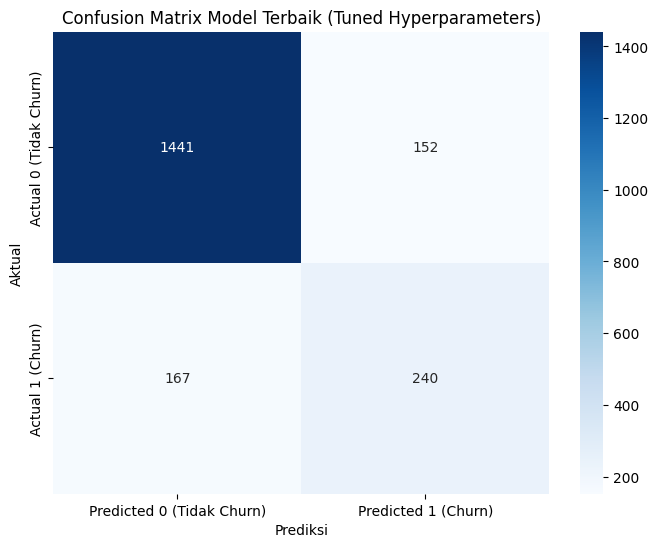

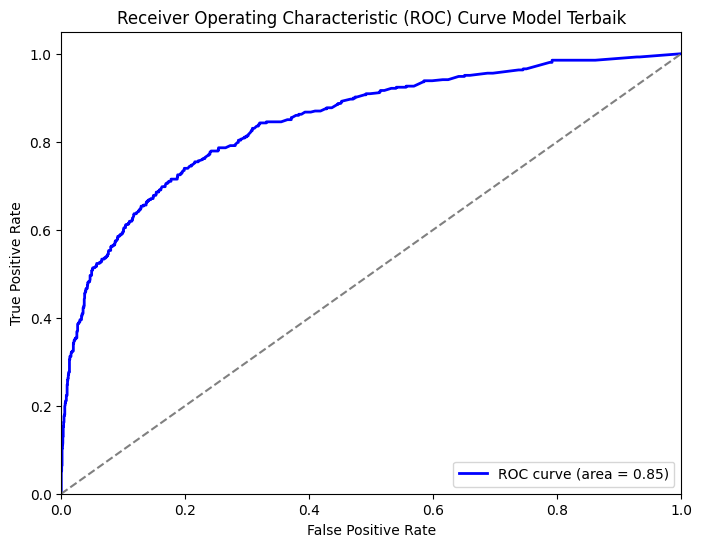

In [9]:
# --- 9. Implementasi Peningkatan: 2. Penyetelan Hyperparameter (GridSearchCV) ---
print("\n--- Implementasi Peningkatan: Penyetelan Hyperparameter (GridSearchCV) ---")

# Menentukan parameter grid untuk RandomForestClassifier
# Ini adalah contoh grid, Anda bisa menambahkan atau mengubah parameter
param_grid = {
    'classifier__n_estimators': [100, 200], # Jumlah pohon
    'classifier__max_depth': [10, 20, None], # Kedalaman maksimum pohon
    'classifier__min_samples_split': [2, 5], # Jumlah minimum sampel untuk membagi node
    'classifier__min_samples_leaf': [1, 2], # Jumlah minimum sampel yang dibutuhkan di daun
    'classifier__class_weight': ['balanced', None] # Mengatasi imbalance data
}

# Membuat model pipeline yang sama dengan sebelumnya untuk GridSearchCV
# GridSearchCV akan melatih classifier dalam pipeline ini
model_for_grid_search = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Menggunakan GridSearchCV.
# Scoring: Pilih metrik yang paling relevan. Untuk churn, 'recall' atau 'f1_weighted' sering digunakan.
# 'recall' akan memaksimalkan kemampuan model untuk menemukan semua churner.
# 'f1_weighted' akan mempertimbangkan f1-score untuk kedua kelas.
grid_search = GridSearchCV(
    estimator=model_for_grid_search,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='recall', # Atau 'f1' atau 'f1_weighted' untuk fokus pada kelas minoritas
    n_jobs=-1, # Menggunakan semua core CPU yang tersedia
    verbose=2
)

# Melatih GridSearchCV pada data yang sudah di-resample
print("\nMemulai GridSearchCV (proses ini mungkin memakan waktu)...")
grid_search.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV selesai!")

# Mendapatkan model terbaik
best_rf_model = grid_search.best_estimator_
print(f"\nParameter terbaik dari GridSearchCV: {grid_search.best_params_}")

# --- Evaluasi Model Terbaik dari GridSearchCV ---
print(f"\n--- Metrik Evaluasi Model Terbaik ({best_rf_model.named_steps['classifier'].__class__.__name__}) ---")

# Membuat prediksi dengan model terbaik
y_pred_tuned = best_rf_model.predict(X_test_processed_df)
y_proba_tuned = best_rf_model.predict_proba(X_test_processed_df)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_tuned):.4f}")

print("\n--- Classification Report Model Terbaik ---")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\n--- Confusion Matrix Model Terbaik ---")
print(cm_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Tidak Churn)', 'Predicted 1 (Churn)'],
            yticklabels=['Actual 0 (Tidak Churn)', 'Actual 1 (Churn)'])
plt.title('Confusion Matrix Model Terbaik (Tuned Hyperparameters)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Kurva ROC Model Terbaik
fpr_tuned, tpr_tuned, thresholds_roc_tuned = roc_curve(y_test, y_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba_tuned):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Model Terbaik')
plt.legend(loc="lower right")
plt.show()


--- Feature Importance (Random Forest Terbaik) ---
              Feature  Importance
1                 Age    0.233986
3             Balance    0.113913
15    NumOfProducts_2    0.106180
4     EstimatedSalary    0.096168
0         CreditScore    0.090782
2              Tenure    0.080135
14    NumOfProducts_1    0.062422
6   Geography_Germany    0.037609
13   IsActiveMember_1    0.029165
12   IsActiveMember_0    0.024363


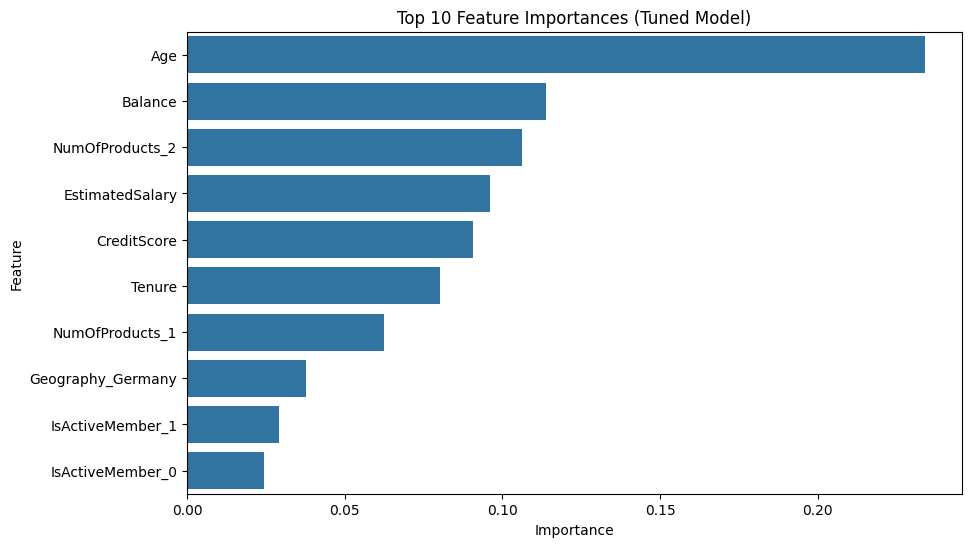

In [10]:
# --- 10. Interpretasi Model Terbaik (Feature Importance) ---
if isinstance(best_rf_model.named_steps['classifier'], RandomForestClassifier):
    print("\n--- Feature Importance (Random Forest Terbaik) ---")
    importances = best_rf_model.named_steps['classifier'].feature_importances_
    feature_names = all_feature_names # Gunakan nama fitur yang sudah diproses
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Feature Importances (Tuned Model)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()